In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Contents**

- [Matrix factorization methods](#1.-Matrix-factorization-methods)
- [Incorporating User and item biases](#2.-Incorporating-user-and-item-biases)

## 1. Matrix factorization methods

In [2]:
def matrix_factorization(R, k, learning_rate, n_epochs):
    m, n = R.shape
    
    # number of nonzero ratings
    n_zero_ratings = np.sum(~np.isnan(R))
    
    # initialization
    U = np.random.randn(m,k)
    V = np.random.randn(n,k)
    
    mean_error = np.zeros(n_epochs)
    
    # gradient descent steps
    for i in range(n_epochs):
        
        # error matrix
        E = R-U.dot(V.T)
        E[np.isnan(E)]=0

        # update U and V
        U,V = U + learning_rate*E.dot(V), V + learning_rate*E.T.dot(U)
        
        # compute mean_error
        error_squared = np.sum(E**2)
        mean_error[i] = np.sqrt(error_squared/(n_zero_ratings))
        
    return U, V, mean_error

**Simple example**

In [3]:
R = np.array([
    [2, np.nan, 3, np.nan],
    [np.nan, 5, np.nan, 4],
    [1, 3, np.nan, 5],
    [np.nan, 4, 2, np.nan]
])
R

array([[ 2., nan,  3., nan],
       [nan,  5., nan,  4.],
       [ 1.,  3., nan,  5.],
       [nan,  4.,  2., nan]])

In [4]:
U, V, mean_error = matrix_factorization(R, 
                                        k = 2,
                                        learning_rate = 0.05,
                                        n_epochs = 50)

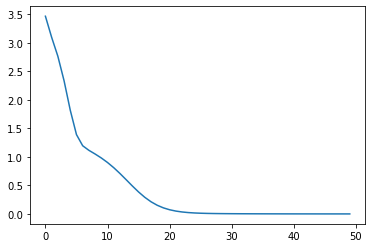

In [5]:
plt.plot(mean_error)

In [6]:
R

array([[ 2., nan,  3., nan],
       [nan,  5., nan,  4.],
       [ 1.,  3., nan,  5.],
       [nan,  4.,  2., nan]])

In [7]:
# approximation of R
U.dot(V.T).round(2)

array([[ 2.  , -5.53,  3.  , -1.72],
       [-0.56,  5.  , -4.26,  4.  ],
       [ 1.  ,  3.  , -4.21,  5.  ],
       [-4.82,  4.  ,  2.  , -5.33]])

**MoviLens dataset example**

In [8]:
ratings = pd.read_csv('ratings_large.csv')
ratings.head()

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)


In [9]:
# ratings matrix
ratings_matrix = ratings.pivot('title','userId','rating')
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,3.0,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# load Javier's fake user (or your fake user, if you created one)
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
user = pd.read_csv(url, index_col='title', squeeze=True)
user

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_13288\407041292.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  user = pd.read_csv(url, index_col='title', squeeze=True)


title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [11]:
# add fake user to the ratings matrix
ratings_matrix['user'] = user
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283164,283165,283170,283183,283184,283185,283195,283204,283224,user
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
R = ratings_matrix.to_numpy()

In [13]:
U, V, mean_error = matrix_factorization(R, 
                                        k = 50, 
                                        learning_rate = .00005, 
                                        n_epochs = 50)

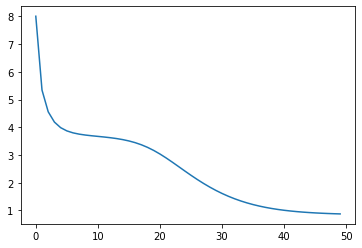

In [14]:
plt.plot(mean_error)

In [15]:
# predictions
R_pred = U.dot(V.T)
user_pred = pd.Series(R_pred[:,-1], index=user.index) 
user_pred

title
(500) Days of Summer (2009)                               2.935303
10 Things I Hate About You (1999)                         2.730625
101 Dalmatians (1996)                                     2.217695
101 Dalmatians (One Hundred and One Dalmatians) (1961)    2.554203
12 Angry Men (1957)                                       3.340357
                                                            ...   
Zoolander (2001)                                          2.470401
Zootopia (2016)                                           3.091343
eXistenZ (1999)                                           2.593718
xXx (2002)                                                2.212999
¡Three Amigos! (1986)                                     2.234708
Length: 1344, dtype: float64

In [16]:
# top 20 recommendations
user_pred[user.isna()].sort_values(ascending=False).head(20)

title
Lives of Others, The (Das leben der Anderen) (2006)                               3.426002
Seven Samurai (Shichinin no samurai) (1954)                                       3.424569
Usual Suspects, The (1995)                                                        3.390897
Once Upon a Time in the West (C'era una volta il West) (1968)                     3.363978
12 Angry Men (1957)                                                               3.340357
Monty Python and the Holy Grail (1975)                                            3.332279
One Flew Over the Cuckoo's Nest (1975)                                            3.320456
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)       3.319836
Silence of the Lambs, The (1991)                                                  3.303768
Modern Times (1936)                                                               3.303515
North by Northwest (1959)                                                         3.

In [17]:
# bottom 20 recommendations
user_pred[user.isna()].sort_values().head(20)

title
Speed 2: Cruise Control (1997)                  1.307076
Super Mario Bros. (1993)                        1.491448
Barb Wire (1996)                                1.516092
Honey, I Blew Up the Kid (1992)                 1.521003
RoboCop 3 (1993)                                1.571099
I Still Know What You Did Last Summer (1998)    1.595071
Anaconda (1997)                                 1.653070
Bio-Dome (1996)                                 1.661615
Flintstones, The (1994)                         1.707096
Richie Rich (1994)                              1.720844
Batman & Robin (1997)                           1.741503
Wild Wild West (1999)                           1.744258
Striptease (1996)                               1.744655
Spy Hard (1996)                                 1.747308
Charlie's Angels: Full Throttle (2003)          1.768343
Mission to Mars (2000)                          1.793770
Beverly Hillbillies, The (1993)                 1.800345
Congo (1995)             

## 2. Incorporating user and item biases

In [18]:
def matrix_factorization_with_biases(R, k, learning_rate, n_epochs):
    m, n = R.shape
    
    # number of nonzero ratings
    n_zero_ratings = np.sum(~np.isnan(R))
    
    # initialization
    U = np.random.randn(m,k+2)
    U[:,k+1] = 1 # set (k+2)th column to 1
    V = np.random.randn(n,k+2)
    V[:,k] = 1 # set (k+1)th column to 1
    
    mean_error = np.zeros(n_epochs)
    
    # gradient descent steps
    for i in range(n_epochs):
        
        # error matrix
        E = R-U.dot(V.T)
        E[np.isnan(E)]=0

        # update U and V
        U, V  = U + learning_rate*E.dot(V), V + learning_rate*E.T.dot(U)
        U[:,k+1] = 1 # restore column of ones
        V[:,k] = 1 # # restore column of ones

        
        # compute mean_error
        error_squared = np.sum(E**2)
        mean_error[i] = np.sqrt(error_squared/(n_zero_ratings))
        
    return U, V, mean_error

**MovieLens dataset example**

In [29]:
U, V, mean_error = matrix_factorization_with_biases(R, 
                                                    k = 50,
                                                    learning_rate = .00005, 
                                                    n_epochs = 50)

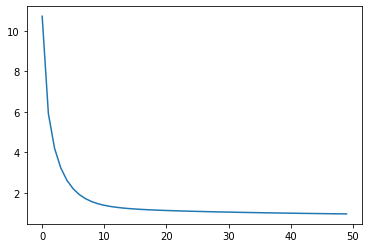

In [30]:
plt.plot(mean_error)

In [31]:
# predictions
R_pred = U.dot(V.T)
user_pred = pd.Series(R_pred[:,-1], index=user.index) # 

In [32]:
# top 20 recommendations
user_pred[user.isna()].sort_values(ascending=False).head(20)

title
Streetcar Named Desire, A (1951)                                               4.122730
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                  4.049061
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.044166
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986)                      4.032680
Modern Times (1936)                                                            4.025115
One Flew Over the Cuckoo's Nest (1975)                                         4.007441
My Neighbor Totoro (Tonari no Totoro) (1988)                                   3.992124
Usual Suspects, The (1995)                                                     3.988938
Cinema Paradiso (Nuovo cinema Paradiso) (1989)                                 3.977607
All About My Mother (Todo sobre mi madre) (1999)                               3.976425
City of God (Cidade de Deus) (2002)                                            3.971903
Lives of Others, The (Das 

In [34]:
# bottom 20 recommendations
user_pred[user.isna()].sort_values().head(20)

title
Richie Rich (1994)                                       1.489229
Barb Wire (1996)                                         1.510710
RoboCop 3 (1993)                                         1.526854
Super Mario Bros. (1993)                                 1.547678
Up Close and Personal (1996)                             1.559755
Bio-Dome (1996)                                          1.668895
Batman & Robin (1997)                                    1.679453
Honey, I Blew Up the Kid (1992)                          1.797348
Striptease (1996)                                        1.826181
Beverly Hillbillies, The (1993)                          1.843113
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    1.860414
Speed 2: Cruise Control (1997)                           1.874932
Junior (1994)                                            1.876574
Anaconda (1997)                                          1.883403
Wild Wild West (1999)                                    1.898950
Milk